# Histogram and density plot
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to make a histogram or density plot.

## Solution
Some sample data: these two vectors contain 200 data points each:

In [1]:
set.seed(1234)
rating  <- rnorm(200)
head(rating)

[1] -1.2070657  0.2774292  1.0844412 -2.3456977  0.4291247  0.5060559

In [2]:
rating2 <- rnorm(200, mean=.8)
head(rating2)

[1] 1.2852268 1.4967688 0.9855139 1.5007335 1.1116810 1.5604624

When plotting multiple groups of data, some graphing routines require a data frame with one column for the grouping variable and one for the measure variable.

In [3]:
# Make a column to indicate which group each value is in
cond <- factor( rep(c("A","B"), each=200) )

data <- data.frame(cond, rating = c(rating,rating2))
head(data)

,cond,rating
1,A,-1.207066
2,A,0.2774292
3,A,1.084441
4,A,-2.345698
5,A,0.4291247
6,A,0.5060559


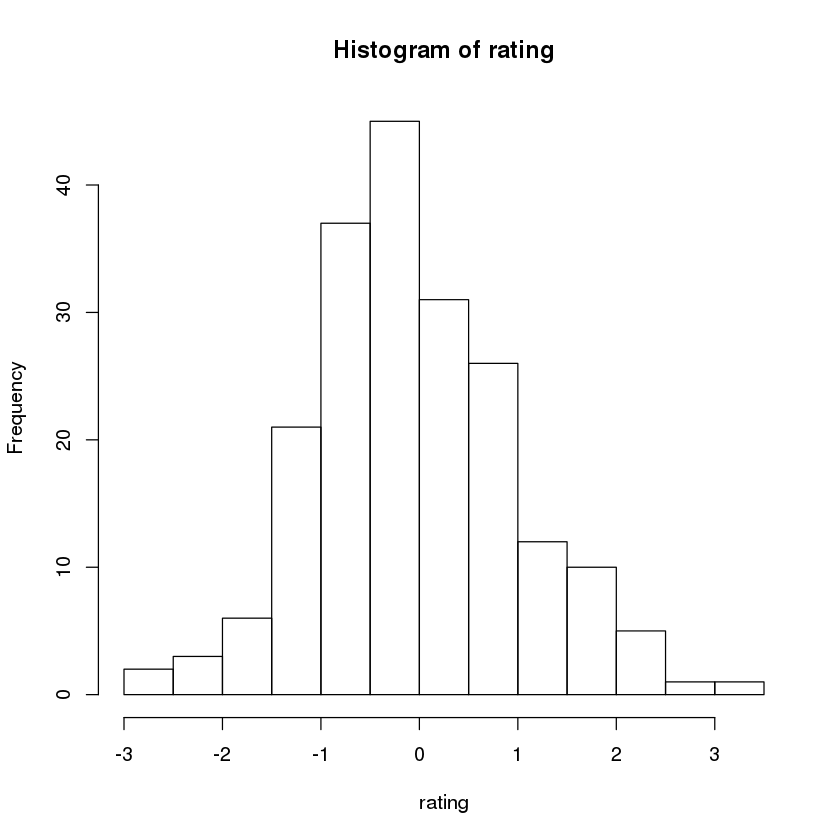

In [4]:
# Histogram
hist(rating)

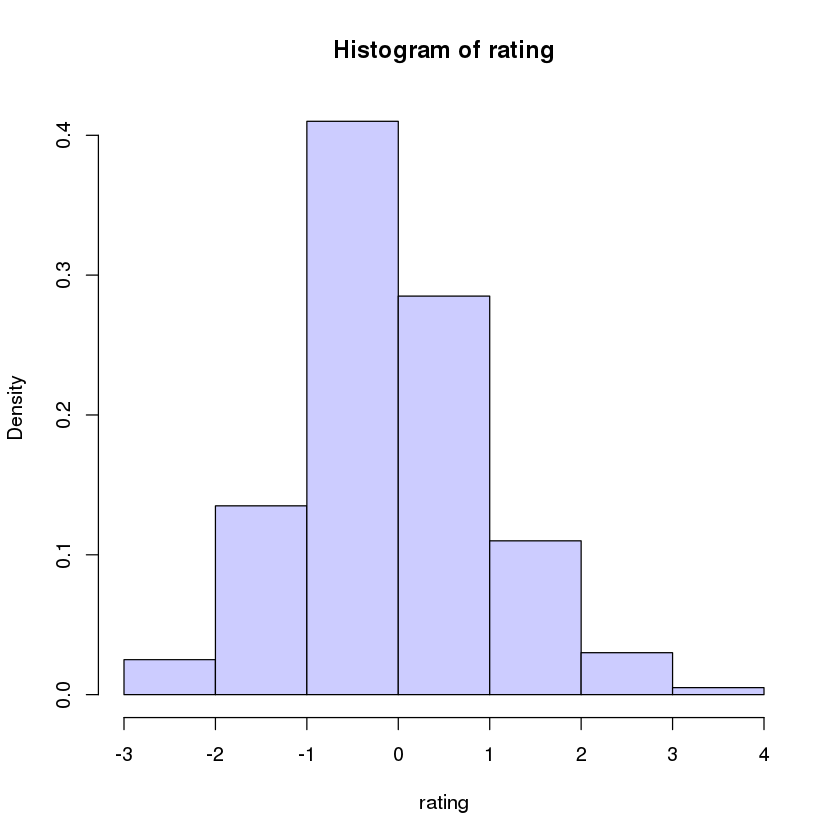

In [5]:
# Use 8 bins (this is only approximate - it places boundaries on nice round numbers)
# Make it light blue #CCCCFF
# Instead of showing count, make area sum to 1, (freq=FALSE)
hist(rating, breaks=8, col="#CCCCFF", freq=FALSE)

In [6]:
# Put breaks at every 0.6
boundaries <- seq(-3, 3.6, by=.6)
boundaries

[1] -3.0 -2.4 -1.8 -1.2 -0.6  0.0  0.6  1.2  1.8  2.4  3.0  3.6

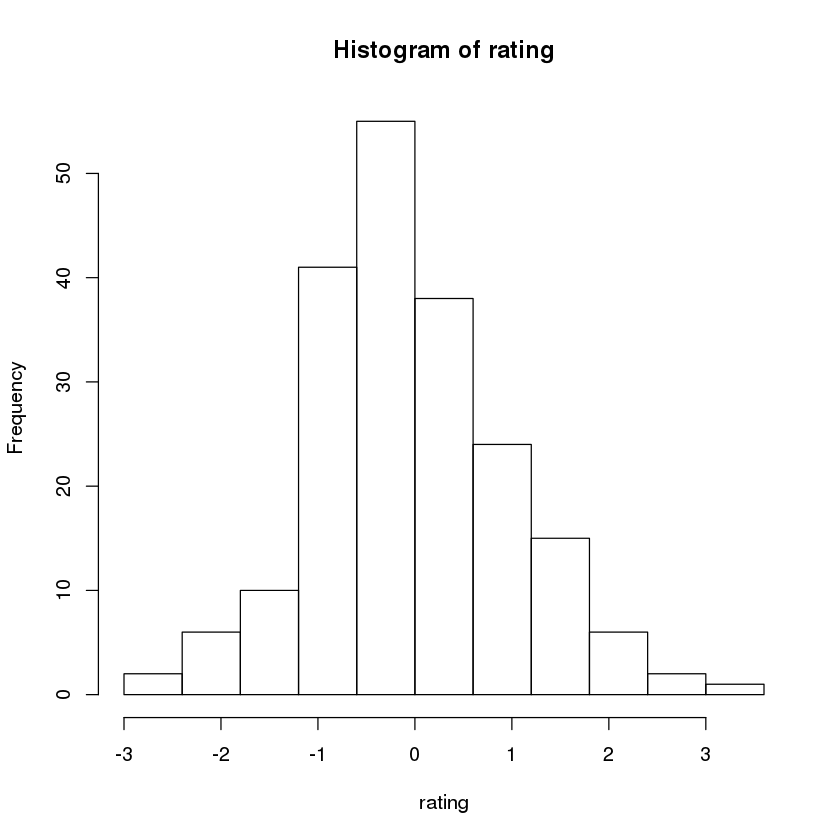

In [7]:
hist(rating, breaks=boundaries)

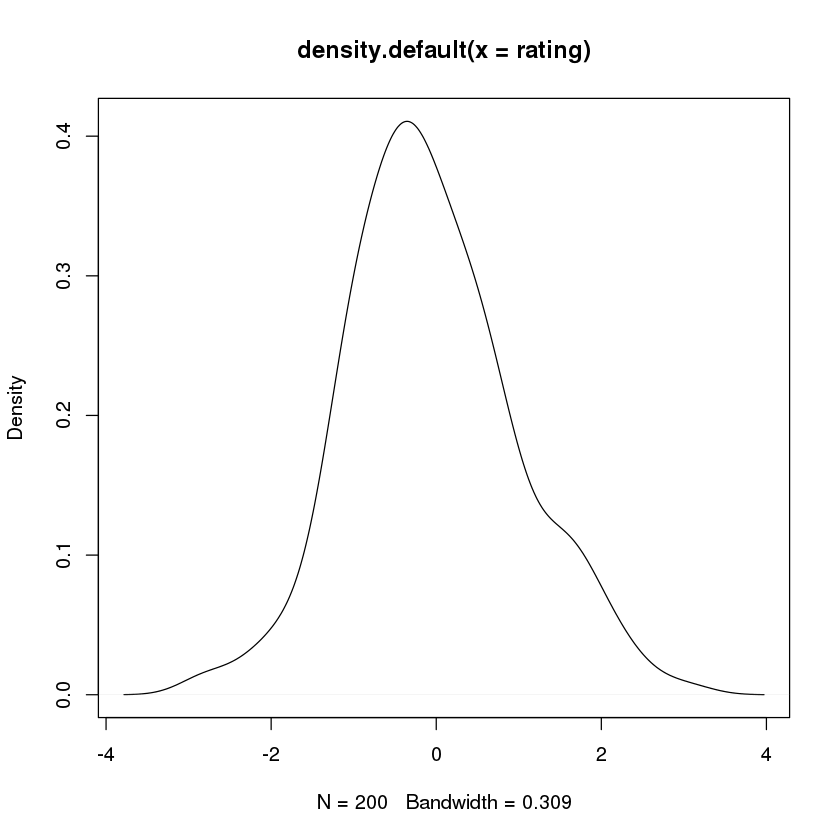

In [8]:
# Kernel density plot
plot(density(rating))

Multiple groups with kernel density plots.

This code is from: http://onertipaday.blogspot.com/2007/09/plotting-two-or-more-overlapping.html

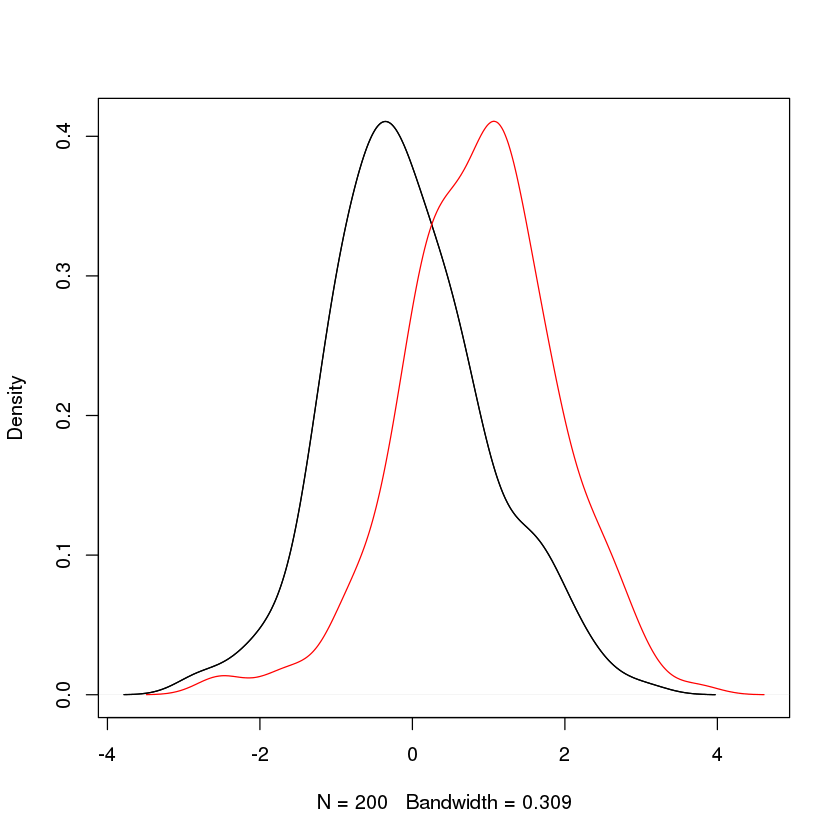

In [9]:
plot.multi.dens <- function(s)
{
    junk.x = NULL
    junk.y = NULL
    for(i in 1:length(s)) {
        junk.x = c(junk.x, density(s[[i]])$x)
        junk.y = c(junk.y, density(s[[i]])$y)
    }
    xr <- range(junk.x)
    yr <- range(junk.y)
    plot(density(s[[1]]), xlim = xr, ylim = yr, main = "")
    for(i in 1:length(s)) {
        lines(density(s[[i]]), xlim = xr, ylim = yr, col = i)
    }
}

# the input of the following function MUST be a numeric list
plot.multi.dens( list(rating, rating2))

The `sm` package also includes a way of doing multiple density plots. The data must be in a data frame.

In [13]:
install.packages("sm", repos = "http://cran.wu.ac.at")
library(sm)


The downloaded source packages are in
	‘/tmp/RtmpYq8ink/downloaded_packages’


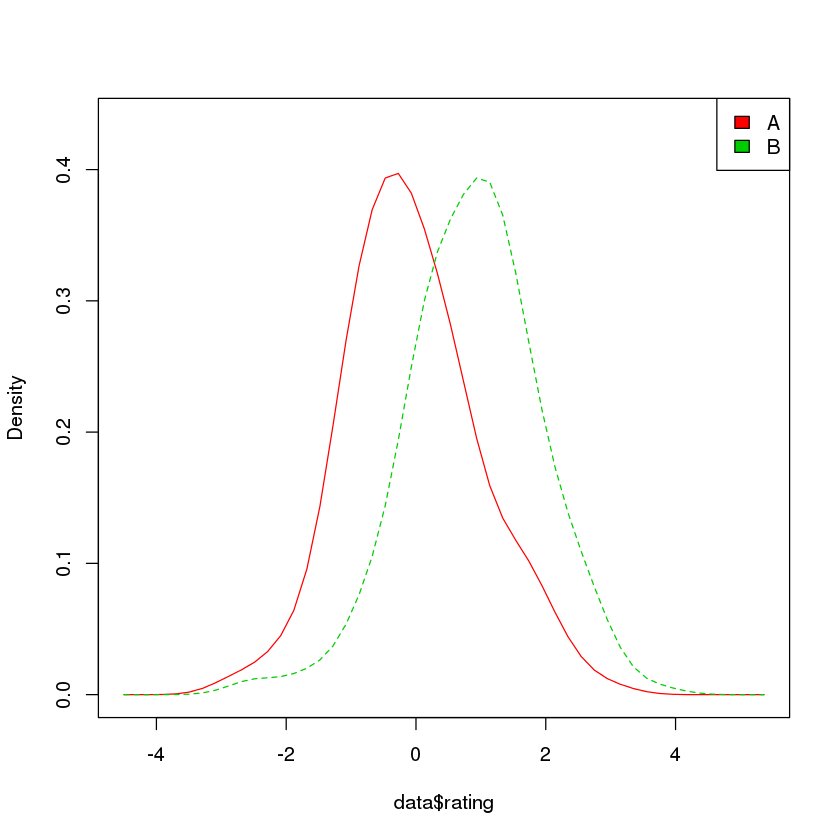

In [14]:
sm.density.compare(data$rating, data$cond)
# Add a legend (the color numbers start from 2 and go up)
legend("topright", levels(data$cond), fill=2+(0:nlevels(data$cond)))